In [17]:
# Idea: function that returns number of observation (amount of time) metric is above a healthy threshold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("c:/Users/zdelk/OneDrive - Southface/Documents/datasets/jan23_iaq_edited.csv")

In [18]:
#- Most thresholds were pulled from https://www.airgradient.com/ 
#- 
thresholds = {
    "Temp" : (30,75),
    "Hum": (30,60),
    "CO2" : (0,1000),
    "PM2.5" : (0, 15)
}

#- threshold range
nested_list = []
for col in data.columns:
    if col in thresholds:
        lower, upper = thresholds[col]
        val_list = []
        for i in range(len(data[col])):
            if data[col][i] >= lower and data[col][i] <= upper:
                val_list.append(1)
            else:
                val_list.append(0)
                
        nested_list.append(val_list)

    else:
        id_list = data[col]
    
binary_thresh_df = pd.DataFrame(nested_list).T
bin_thresh_full = pd.concat([id_list, binary_thresh_df], axis=1)

bin_thresh_full.columns = data.columns

In [19]:
thresholds = {
    "Temp": {
        "Healthy": (68, 75),
        "Warning": (64.4, 78.8),
        "Unhealthy": (60.8, 82.4)
    },
    "Hum": {
        "Healthy": (30, 60),
        "Warning": (25, 65),
        "Unhealthy":(20, 70)
    },
    "CO2": {
        "Healthy": (0, 800),
        "Warning": (0, 1000),
        "Unhealthy": (0, 1500)
    },
    "PM2.5": {
        "Healthy": (0, 15),
        "Warning": (0, 35),
        "Unhealthy":(0, 55)
    },
    "PM10": {
        "Healthy": (0, 15),
        "Warning": (0, 35),
        "Unhealthy":(0, 55)
    }
}

In [20]:
nested_list = []
for col in data.columns:
    if col in thresholds:
        col_thresholds = thresholds[col]
        val_list = []
        for value in data[col]:
            category = None
            for label, (lower, upper) in col_thresholds.items():
                if lower <= value <= upper:
                    category = label
                    break
                else:
                    category = "Dangerous"
            val_list.append(category)
        nested_list.append(val_list)
    else:
        id_list = data[col]
        

classified_df = pd.DataFrame(nested_list).T
multi_class_df = pd.concat([id_list, classified_df], axis=1)

multi_class_df.columns = data.columns

           Temp   Hum   CO2  PM2.5
Dangerous     1     0     5     84
Healthy     157  5738  6972   6832
Unhealthy  2635     1    91     34
Warning    4408  1462   133    251


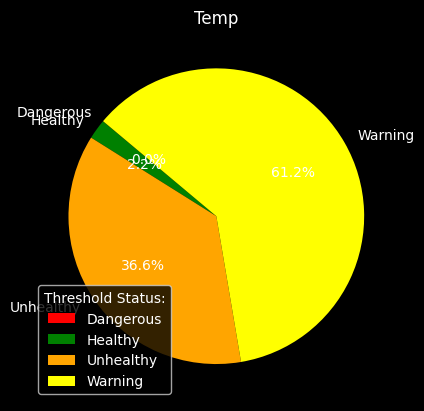

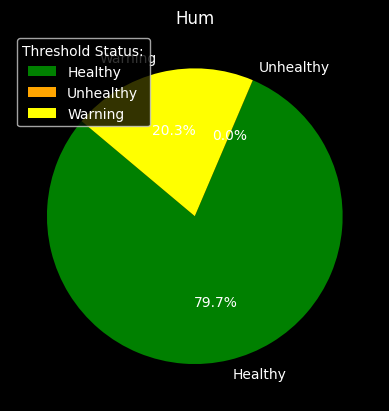

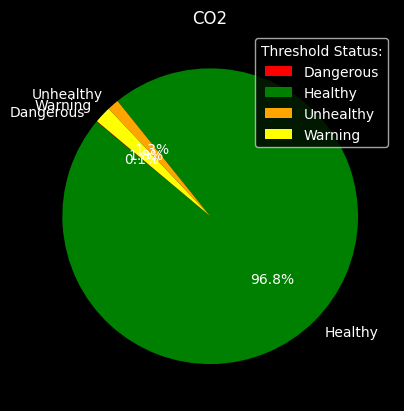

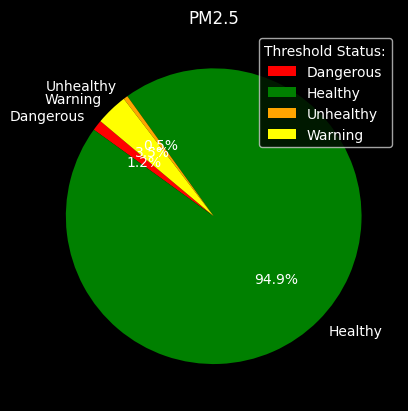

In [21]:
#- Full frequency table
freq_table = multi_class_df.iloc[:,1:].apply(lambda col: col.value_counts()).fillna(0).astype(int)
print(freq_table)
category_colors = {
    "Healthy": "green",
    "Warning": "yellow",
    "Unhealthy": "orange",
    "Dangerous": "red"
}

for col in freq_table:
    filter_col = {k: v for k,v in freq_table[col].items() if v>0}
    
    labels = list(filter_col.keys())
    values = list(filter_col.values())
    
    colors = [category_colors[label] for label in labels]
    
    plt.pie(values, labels=labels, colors=colors,
            autopct='%1.1f%%', startangle=140)
    plt.legend(title = "Threshold Status:")
    plt.title(freq_table[col].name)
    plt.show()

In [22]:
#- Percent (%) of time  within Healthy threshold range
print(round(bin_thresh_full.iloc[:,1:].sum() / bin_thresh_full.iloc[:,1:].count() * 100, 2))

Temp     100.00
Hum       79.68
CO2       98.67
PM2.5     94.88
dtype: float64


In [17]:
import iaq_functions as iaq
data = pd.read_csv("c:/Users/zdelk/OneDrive - Southface/Documents/datasets/jan23_iaq_edited.csv")

classified_data = iaq.multiclass_threshold(data=data)

In [ ]:
iaq.pie_plotter(data=classified_data)


In [16]:
# Longest time under threshold - LIST
test_list = [1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 7, 1, 1, 8, 1]
thresh = 3

ticker = 0
time_len = 0

for i in range(len(test_list)):
    # print(test_list[i])
    if test_list[i] <= thresh:
        ticker +=1
    else:
        ticker = 0
        # print("reset")
    # print(ticker)
    if ticker > time_len:
        time_len = ticker
    else:
        pass
        # print("Ticker less than longest")
        
print("Final Ticker: ", ticker)
print("Longest Time Length: ", time_len)
        

Final Ticker:  1
Longest Time Length:  8


In [31]:
time_len_dict = {}
use_df = bin_thresh_full.iloc[:,1:]

for col in use_df.columns:
    
    ticker_g = ticker_b = time_len_g = time_len_b = 0
    store_dict = {}
    for val in use_df[col]:
        if val == 1:
            ticker_g += 1
            ticker_b = 0
        elif val == 0:
            ticker_g = 0
            ticker_b += 1
        
        if ticker_g > time_len_g:
            time_len_g = ticker_g
        elif ticker_b > time_len_b:
            time_len_b = ticker_b
                
    store_dict["Below"] = time_len_g
    
    store_dict["Above"] = time_len_b 
    time_len_dict[col] = store_dict

print(time_len_dict)

{'Temp': {'Below': 7201, 'Above': 0}, 'Hum': {'Below': 2684, 'Above': 688}, 'CO2': {'Below': 4085, 'Above': 94}, 'PM2.5': {'Below': 1555, 'Above': 59}}
